In [91]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [92]:
df = pd.read_csv('csv/Audience Report Formatted.csv')

df_claravine = pd.read_csv('csv/Claravine.csv')

In [93]:
df_merged = pd.merge(df, df_claravine, on ='Segment ID', how='left')

In [94]:
df_merged.fillna(0, inplace=True)

In [95]:
# Grouping columns
grouping_cols = ['Funnel'
                 , 'Country_x'
                 , 'Dell Fiscal Quarter'
                 , 'Vehicle'
                 , 'BU_lvl2'
                 , 'BU_lvl1'
                 , 'Campaign Name'
                 , 'Audience Type Category'
                 , 'Audience Source']

# Aggregation functions
agg_funcs = {
    'Spend': 'sum',
    'Revenue': 'sum'
}

# Create the new dataframe
grouped_df = df_merged.groupby(grouping_cols).agg(agg_funcs).reset_index()

# Calculate ROAS
grouped_df['ROAS'] = grouped_df['Revenue'] / grouped_df['Spend']

# Round the values in the 'grouped_df' DataFrame to two decimal places
grouped_df = grouped_df.round(decimals=2, out=None)

# Print or display the new dataframe
grouped_df.head()


,Funnel,Country_x,Dell Fiscal Quarter,Vehicle,BU_lvl2,BU_lvl1,Campaign Name,Audience Type Category,Audience Source,Spend,Revenue,ROAS
0,Active Prospects,ANDEAN,FY24Q2,Social,Client Solutions Group,B2B,2024_Q1_ANDEAN-CO_CSG_AP_SOCIAL_PROSPECTING-EN...,IN MARKET-3PD BEHAVIOR,0,214.80,0.0,0.0
1,Active Prospects,ANDEAN,FY24Q2,Social,Client Solutions Group,B2B,2024_Q1_ANDEAN-CO_CSG_AP_SOCIAL_PROSPECTING-EN...,IN MARKET-3PD BEHAVIOR,0,321.60,0.0,0.0
2,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,0,925.38,0.0,0.0
3,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,0,924.14,0.0,0.0
4,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,0,1112.93,0.0,0.0


In [96]:
grouped_csb_df = grouped_df[grouped_df['BU_lvl1'].isin(['CSB'])]

grouped_b2b_df = grouped_df[grouped_df['BU_lvl1'].isin(['B2B'])]

[]

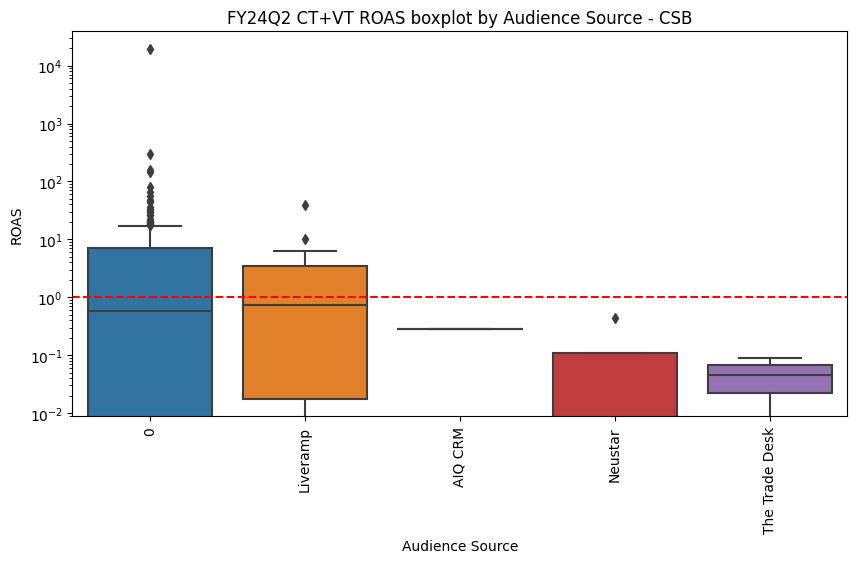

In [97]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - CSB')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Audience Source', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

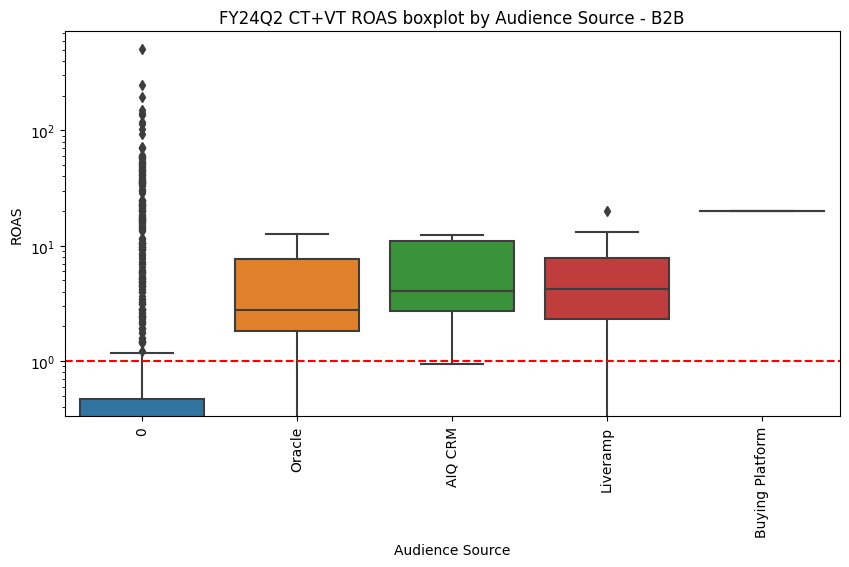

In [98]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('FY24Q2 CT+VT ROAS boxplot by Audience Source - B2B')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_b2b_df, x='Audience Source', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()
